In [19]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
IMAGE_SIZE = 256
CHANNELS=3

train_datagen=ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10,
    shear_range=0.2,
    zoom_range=0.2,
)

train_generator= train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=30,
    class_mode='binary'
)

Found 306 images belonging to 7 classes.


In [21]:
train_generator.class_indices

{'Image Not Clear': 0,
 'Tea leaf blight': 1,
 'Tea red leaf spot': 2,
 'Tea red scab': 3,
 'algal-leaf-spot': 4,
 'blister-blight': 5,
 'healty-leaf': 6}

In [22]:
validation_datagen=ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

validation_generator= validation_datagen.flow_from_directory(
    'dataset/val',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=30,
    class_mode='binary'
)

Found 86 images belonging to 7 classes.


In [23]:
test_datagen=ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

test_generator= test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=30,
    class_mode='binary'
)

Found 49 images belonging to 7 classes.


In [24]:
input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes=7
model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size= (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)), 
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 64)      

In [26]:
model.compile(
    optimizer='adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [27]:
history = model.fit(
        train_generator,
        steps_per_epoch=9,
        batch_size=30,
        validation_data=validation_generator,
        validation_steps=5,
        verbose=1,
        epochs=90
        )

Epoch 1/90
9/9 [==============================] - 19s 2s/step - loss: 1.9075 - accuracy: 0.2073 - val_loss: 1.8488 - val_accuracy: 0.2326
Epoch 2/90
9/9 [==============================] - 13s 1s/step - loss: 1.8369 - accuracy: 0.2222
Epoch 3/90
9/9 [==============================] - 13s 1s/step - loss: 1.7475 - accuracy: 0.2724
Epoch 4/90
9/9 [==============================] - 12s 2s/step - loss: 1.5913 - accuracy: 0.3496
Epoch 5/90
9/9 [==============================] - 13s 1s/step - loss: 1.4657 - accuracy: 0.3333
Epoch 6/90
9/9 [==============================] - 14s 1s/step - loss: 1.4628 - accuracy: 0.4146
Epoch 7/90
9/9 [==============================] - 13s 2s/step - loss: 1.4953 - accuracy: 0.4024
Epoch 8/90
9/9 [==============================] - 14s 2s/step - loss: 1.3613 - accuracy: 0.4228
Epoch 9/90
9/9 [==============================] - 14s 2s/step - loss: 1.3684 - accuracy: 0.4675
Epoch 10/90
9/9 [==============================] - 14s 2s/step - loss: 1.2785 - accuracy: 0.46

In [28]:
scores=model.evaluate(test_generator) 

2/2 [==============================] - 2s 797ms/step - loss: 2.2459 - accuracy: 0.6327


In [29]:
scores

[2.2459163665771484, 0.6326530575752258]

In [30]:
history

In [31]:
history.params

{'verbose': 1, 'epochs': 90, 'steps': 9}

In [39]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [32]:
import numpy as np

In [33]:
class_names=['Image Not Clear','Tea leaf blight','Tea red leaf spot','Tea red scab','algal-leaf-spot', 'blister-blight', 'healty-leaf']

In [34]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(img)
    img_array=tf.expand_dims(img_array, 0)
    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])), 2)
    return predicted_class, confidence

In [40]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss= history.history['loss']
val_loss=history.history['val_loss']

ValueError: x and y must have same first dimension, but have shapes (90,) and (1,)

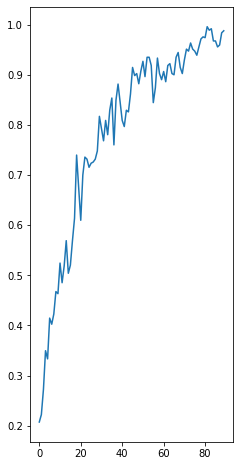

In [44]:

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(90), acc, label='Training Accuracy')
plt.plot(range(90), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(90), loss, label='Training Loss')
plt.plot(range(90), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

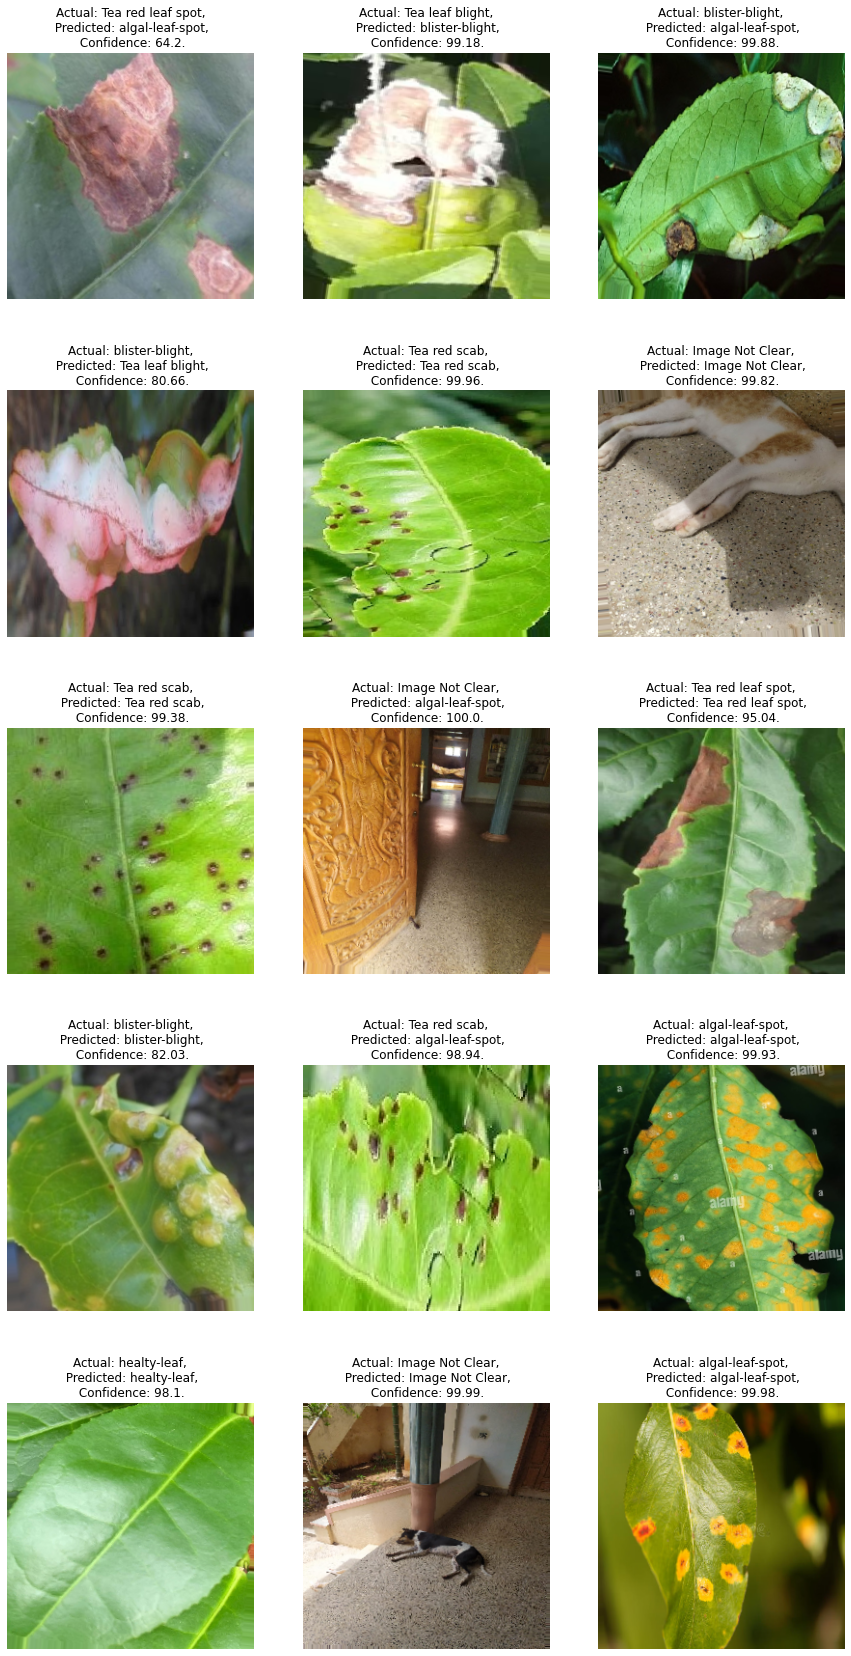

In [37]:
plt.figure(figsize=(15, 30))
for images, labels in test_generator:
    for i in range(15):
        ax=plt.subplot(5, 3, i+1)
        plt.imshow(images[i])
        predicted_class, confidence= predict(model, images[i])
        actual_class=class_names[int(labels[i])]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence: {confidence}.")
        plt.axis("off")
    break

In [ ]:
model.save(f"../saved_models/test13.h5")

In [ ]:
model.save(f"../saved_models/test13")

INFO:tensorflow:Assets written to: ../saved_models/test13\assets
